# Lecture-08 Thin Films-2
* author : Wei-Kai Lee
* Data : 2019/02/23

In [1]:
# python module
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# optics module
from optics.TransferMatrix import cal_r_tau_from_structure, cal_field_z, plot_fun, cal_field_z_2
from optics.RTA import cal_TRA_from_structure
from optics.PlaneWave import cal_s, cal_p

In some situation, we would like to reduce the transmittance between two material ($n_0$ and $n_2$) and an additional layer would insert into these two material ($n_1$) as in **Fig. 9**. In the following section, we are going to discuss the influence of the middle layer.

<img src="Lecture-8-Material/Fig-9.jpg" width= "400">
$$Fig. 9.$$

In [19]:
# constants
e0, mu0 = 1.0, 1.0
c = 1/np.sqrt(e0*mu0)

# input structure and parameters
n_array = np.array( [1.0, 1.25, 1.5], dtype = np.complex )
theta1 = np.array( [0], dtype=np.float64 )
wavelength = 520
thickness_scanlist = np.linspace( 0, 1000, 1000)

# input parameters process
ko = 2*np.pi/wavelength
w = c * ko
er_list = n_array**2

# from angle to wave number
k1 = n_array[0]*ko
kx = k1 * np.sin(theta1)
ky = np.zeros( kx.shape )


In [20]:
def cal_r_tau_from_structure_middle_thickness_scan( kx, ky, thickness_scanlist, ko, er_list , mur_list = None, mode='TE'):
    tempt = tuple( [len(thickness_scanlist)] )
    tau = np.zeros( tempt +  kx.shape, dtype=np.complex )
    r = np.zeros( tempt +  kx.shape, dtype=np.complex )
    
    for ii, thickOf2nd in enumerate(thickness_scanlist):
        thickness_list = [0, thickOf2nd, 0]
        tau[ii], r[ii], k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list , mur_list = None, mode=mode)
    return tau, r, k_list, kz_list

In [21]:
def cal_TRA_from_structure_middle_thickness_scan( kx, ky, thickness_scanlist, ko, er_list, mur_list = None, mode = 'TE'):
    tempt = tuple( [len(thickness_scanlist)] )
    T = np.zeros( tempt +  kx.shape, dtype=np.float )
    R = np.zeros( tempt +  kx.shape, dtype=np.float )
    A = np.zeros( tempt +  kx.shape, dtype=np.float )
    
    for ii, thickOf2nd in enumerate(thickness_scanlist):
        thickness_list = [0, thickOf2nd, 0]
        T[ii], R[ii], A[ii] = cal_TRA_from_structure( kx, ky, thickness_list, ko, er_list, mur_list = mur_list, mode = mode)
    return T, R, A

In [22]:
tau_s_E, r_s_E, k_list, kz_list = cal_r_tau_from_structure_middle_thickness_scan( kx, ky, thickness_scanlist, ko, er_list, mode='TE')
tau_p_H, r_p_H, k_list, kz_list = cal_r_tau_from_structure_middle_thickness_scan( kx, ky, thickness_scanlist, ko, er_list, mode='TM')
r_p_E = r_p_H
tau_p_E = (n_array[0]/n_array[-1])*tau_p_H

Ts, Rs, As = cal_TRA_from_structure_middle_thickness_scan( kx, ky, thickness_scanlist, ko, er_list, mode='TE')
Tp, Rp, Ap = cal_TRA_from_structure_middle_thickness_scan( kx, ky, thickness_scanlist, ko, er_list, mode='TM')

(-185, 185)

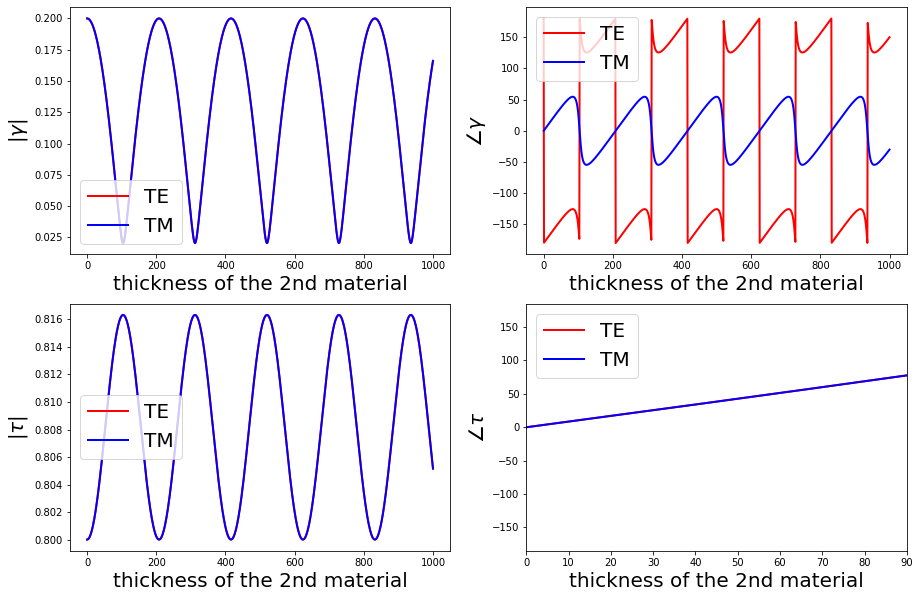

In [23]:
## plot data
fig, axes = plt.subplots(2,2)
plt.rcParams['figure.figsize'] = [15, 10]

axes[0,0].plot( thickness_scanlist, np.abs( r_s_E ), 'r-', linewidth=2.0)
axes[0,0].plot( thickness_scanlist, np.abs( r_p_E ), 'b-', linewidth=2.0)
axes[0,0].set_xlabel(r'thickness of the 2nd material', fontsize=20)
axes[0,0].set_ylabel(r'$|\gamma|$', fontsize=20)
axes[0,0].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);

axes[0,1].plot( thickness_scanlist, np.angle( r_s_E, deg=True ), 'r-', linewidth=2.0)
axes[0,1].plot( thickness_scanlist, np.angle( r_p_E, deg=True ), 'b-', linewidth=2.0)
axes[0,1].set_xlabel(r'thickness of the 2nd material', fontsize=20)
axes[0,1].set_ylabel(r'$\angle\gamma$', fontsize=20)
axes[0,1].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -185, 185);

axes[1,0].plot( thickness_scanlist, np.abs( tau_s_E ), 'r-', linewidth=2.0)
axes[1,0].plot( thickness_scanlist, np.abs( tau_p_E ), 'b-', linewidth=2.0)
axes[1,0].set_xlabel(r'thickness of the 2nd material', fontsize=20)
axes[1,0].set_ylabel(r'$|\tau|$', fontsize=20)
axes[1,0].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);

axes[1,1].plot( thickness_scanlist, np.angle( tau_s_E, deg=True ), 'r-', linewidth=2.0)
axes[1,1].plot( thickness_scanlist, np.angle( tau_p_E, deg=True ), 'b-', linewidth=2.0)
axes[1,1].set_xlabel(r'thickness of the 2nd material', fontsize=20)
axes[1,1].set_ylabel(r'$\angle\tau$', fontsize=20)
axes[1,1].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90)
plt.ylim( -185, 185)

The simulated results of the TE mode and the TM mode are similar because what we simulated is about the normal incidence. For the normal incidence, the direction of the TE mode electric field and the TM mode field are both along the interface and hence, there is no difference between the boundary for these two modes. But you may ask, why there is the difference between the phase of $\gamma$. Don't forget that we have do a little trick when we deal with the normal incidence in **Lecture 6-1**. The directions of TE mode of +z and -z wave are in the same direction but for the TM mode, the electric field direction are different for +z and -z wave.

(-10, 110)

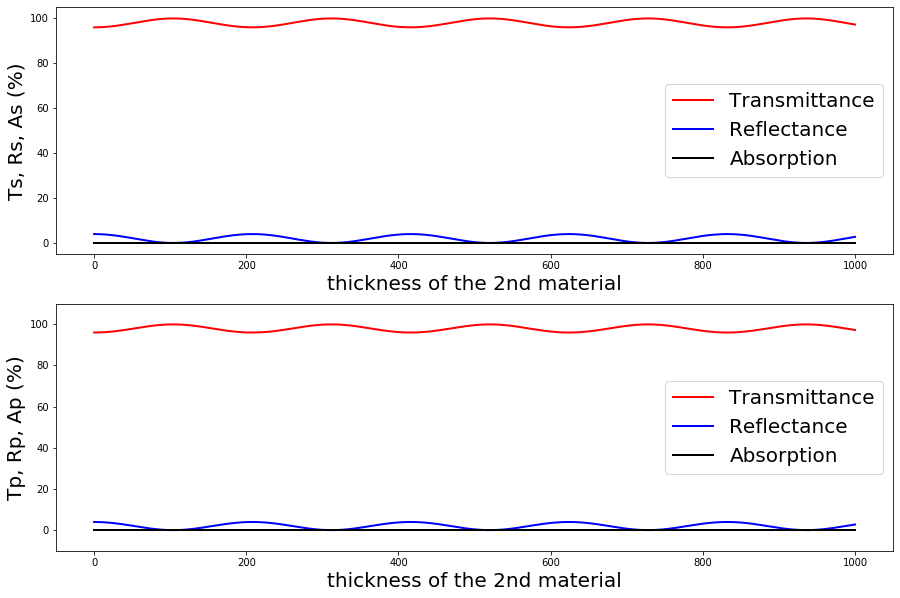

In [24]:
## plot data
fig, axes = plt.subplots(2,1)

axes[0].plot( thickness_scanlist, Ts * 100, 'r-', linewidth=2.0)
axes[0].plot( thickness_scanlist, Rs * 100, 'b-', linewidth=2.0)
axes[0].plot( thickness_scanlist, As * 100, 'k-', linewidth=2.0)
axes[0].set_xlabel(r'thickness of the 2nd material', fontsize=20)
axes[0].set_ylabel(r'Ts, Rs, As (%)', fontsize=20)
axes[0].legend(['Transmittance', 'Reflectance', 'Absorption'], fontsize=20)
plt.ylim( -10, 110);

axes[1].plot( thickness_scanlist, Tp * 100, 'r-', linewidth=2.0)
axes[1].plot( thickness_scanlist, Rp * 100, 'b-', linewidth=2.0)
axes[1].plot( thickness_scanlist, Ap * 100, 'k-', linewidth=2.0)
axes[1].set_xlabel(r'thickness of the 2nd material', fontsize=20)
axes[1].set_ylabel(r'Tp, Rp, Ap (%)', fontsize=20)
axes[1].legend(['Transmittance', 'Reflectance', 'Absorption'], fontsize=20)
plt.ylim( -10, 110)

From the simulated results, we can found that the transmission coefficient, reflection coefficient, transmittance, and reflectance would vary as changing the thickness of the middle material. We also can found that it is a periodic curve; however, the period seems not related to the wavelength (520 nm). But don't forget the wavelength in the material is not equal to the wavelength in vacuum. 

In [30]:
wv_list = np.real( wavelength/n_array )
print(wv_list[1])

416.0


Oh, it seems that the periods of the curves are half of the calculated wavelength in the middle material, showing that the the to design a multi-layered functional strucuture. The unit to measured the thickness of the material is half of the wavelength in the material. 

As in the T, R, A figure, when $d_1$ equals to zero, the transmittance would achieve the minimum value. When $d_1 = 416 nm/2 = 208 nm$, the transmittance would become the maximum value again.

In the following section, we are going to analyze the details for $d_1 = 0 nm, 416/4 nm, and 416/2 nm$.

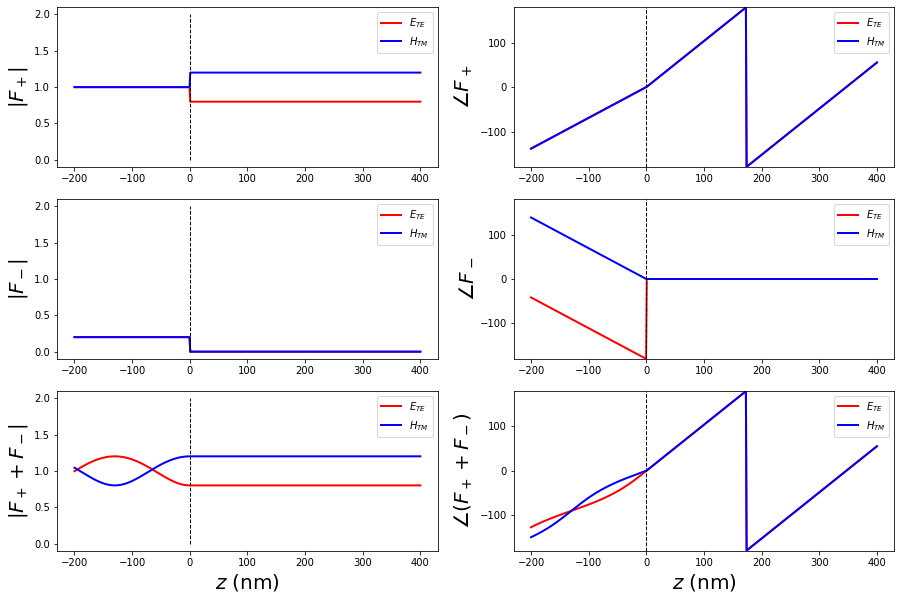

In [40]:
theta1 = np.array( [0, 30, 60], dtype=np.float )/180*np.pi
kx = k1 * np.sin(theta1)
ky = np.zeros( kx.shape )
z_list = np.linspace(-200, 400, 500)
thickness_list = [0, 0, 0]
Ep_zlist, En_zlist, LayerIndex, k_list, kz_list = cal_field_z( kx, ky, z_list, thickness_list, ko, er_list , mode='TE', Fp = 1.0)
Hp_zlist, Hn_zlist, LayerIndex, k_list, kz_list = cal_field_z( kx, ky, z_list, thickness_list, ko, er_list , mode='TM', Fp = 1.0)

# incidence angle = 0
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=0)

When $d_1 = 0 nm$, it is equivalent to there's no additional layer inserting between material 0 and material 2.
Because $n_2 > n_0$, the direction of the reflected electric field would flip to the different direction of the incident wave. Hence, the phase of -z $E_{TE}$ wave is $-180^o$ at $z=0$.

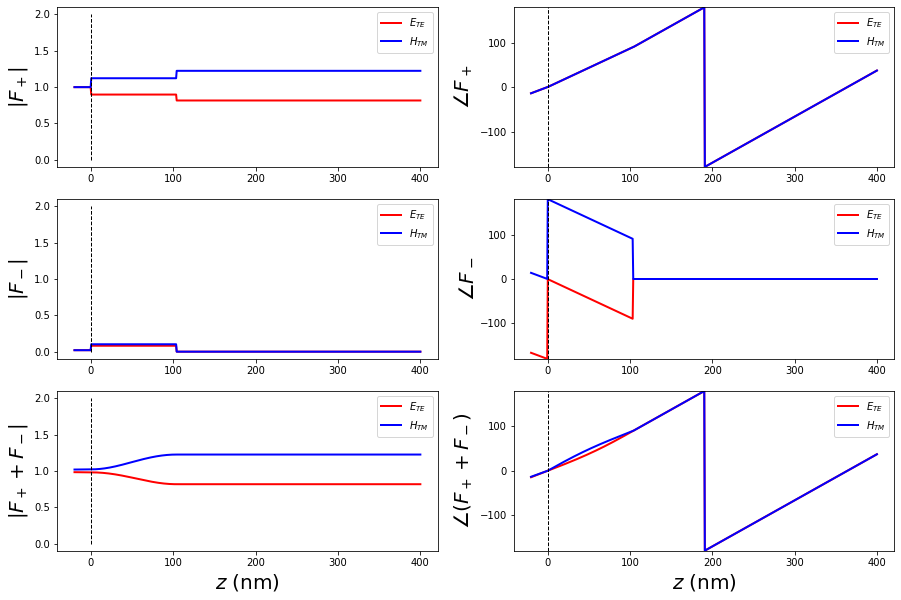

In [41]:
theta1 = np.array( [0, 30, 60], dtype=np.float )/180*np.pi
kx = k1 * np.sin(theta1)
ky = np.zeros( kx.shape )
z_list = np.linspace(-20, 400, 600)
thickness_list = [0, wv_list[1]/4, 0]
Ep_zlist, En_zlist, LayerIndex, k_list, kz_list = cal_field_z( kx, ky, z_list, thickness_list, ko, er_list , mode='TE', Fp = 1.0)
Hp_zlist, Hn_zlist, LayerIndex, k_list, kz_list = cal_field_z( kx, ky, z_list, thickness_list, ko, er_list , mode='TM', Fp = 1.0)

# incidence angle = 0
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=0)

When $d_1 = 416/4 nm$, the phase of the +z and -z wave of $E_{TE}$ both equal to 0 at $z=0$, indicating that +z and -z wave would be constructed at $z=0$. 

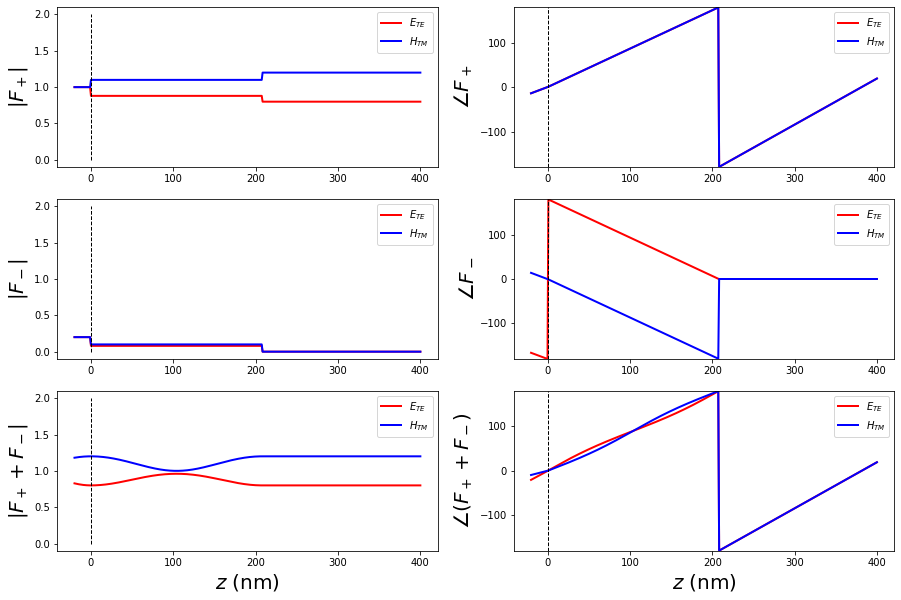

In [38]:
theta1 = np.array( [0, 30, 60], dtype=np.float )/180*np.pi
kx = k1 * np.sin(theta1)
ky = np.zeros( kx.shape )
z_list = np.linspace(-20, 400, 400)
thickness_list = [0, wv_list[1]/2, 0]
Ep_zlist, En_zlist, LayerIndex, k_list, kz_list = cal_field_z( kx, ky, z_list, thickness_list, ko, er_list , mode='TE', Fp = 1.0)
Hp_zlist, Hn_zlist, LayerIndex, k_list, kz_list = cal_field_z( kx, ky, z_list, thickness_list, ko, er_list , mode='TM', Fp = 1.0)

# incidence angle = 0
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=0)